# Datan havainnollistamiseksi

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from viivanleveys import *


plt.interactive(False)



def read_csv(filename):
    return np.genfromtxt(filename, delimiter=',')

## usemman kubitin systeemi

In [1]:
data1= read_csv("q_lkm0-2.csv")
data2= read_csv("q_lkm3.csv")


NameError: name 'read_csv' is not defined

300000


<IPython.core.display.Javascript object>


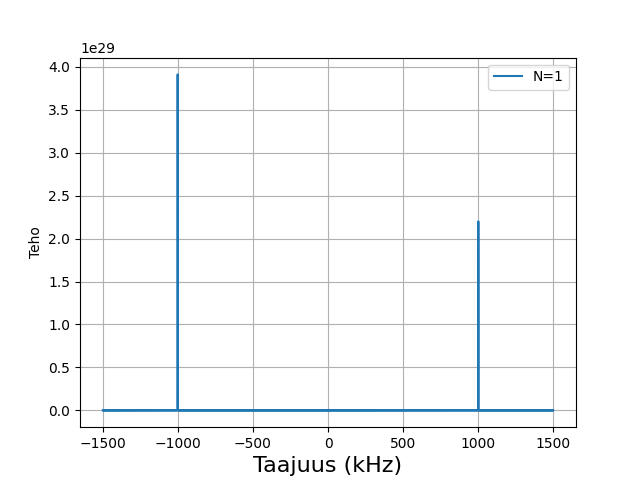

In [3]:
freq = np.array(data1[0])
power = np.array(data1[1])
print(len(freq))
plt.plot(freq, power)
plt.grid()
plt.xlabel("Taajuus (kHz)", fontsize=16)
plt.ylabel("Teho")
plt.legend(["N=1", "N=2", "N=3"])
plt.show()

<IPython.core.display.Javascript object>


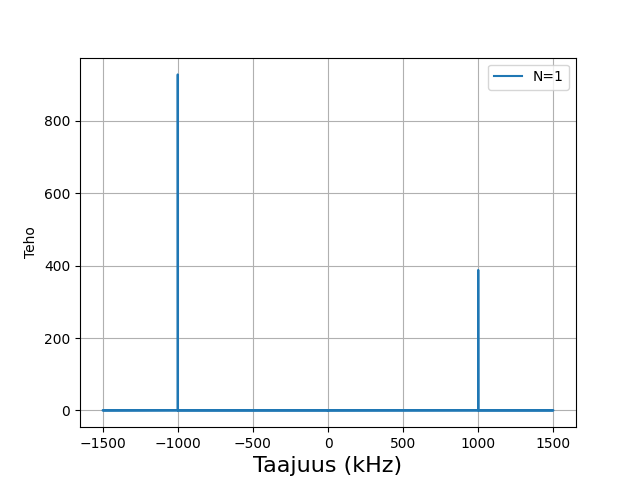

[-999.7466675000001, -999.4866683666667, -999.2366692]


<IPython.core.display.Javascript object>


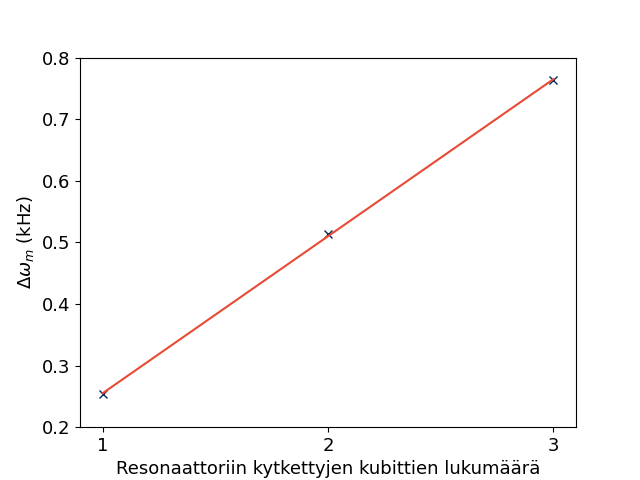

In [4]:
plt.rcParams['axes.titlesize'] = 36
f = []
i=2
while i < len(data1):
    freq = np.array(data1[i])
    power = np.array(data1[i+1])
    if i==2:plt.plot(freq, power)
    f.append(viivanleveys(freq,power)[1])
    i = i + 2
freq = np.array(data2[0])
power = np.array(data2[1])
#plt.plot(freq, power)
f.append(viivanleveys(freq,power)[1])

plt.grid()
plt.xlabel("Taajuus (kHz)", fontsize=16)
plt.ylabel("Teho")
plt.legend(["N=1", "N=2", "N=3"])
plt.show()
print(f)

lkm = [1,2,3]
deltaf= np.array(f[0:])+1000
plt.plot(lkm, deltaf , 'x', color='#042b56')

m, b = np.polyfit(lkm, deltaf, 1)
plt.plot(lkm, m*np.array(lkm) + b, color='#e84a34')

plt.xlabel("Resonaattoriin kytkettyjen kubittien lukumäärä", fontsize=13)
plt.ylabel("$\Delta \omega_m$ (kHz)", fontsize=13)
plt.xticks(np.arange(1, 4, 1.0), fontsize=13)
plt.yticks(np.arange(0.2, 0.9, 0.1), fontsize=13)
plt.savefig('lkm_f'+'.pdf',dpi=300, bbox_inches = 'tight') 
plt.show()


## Kytkentävakion vaikutus

In [5]:
data3 = read_csv("fwhm_max_g.csv")
print(data3)

[[ 0.00000000e+00  1.57079633e+01  3.14159265e+01  4.71238898e+01
   6.28318531e+01  7.85398163e+01  9.42477796e+01  1.09955743e+02
   1.25663706e+02  1.41371669e+02  1.57079633e+02  1.72787596e+02
   1.88495559e+02  2.04203522e+02  2.19911486e+02  2.35619449e+02
   2.51327412e+02  2.67035376e+02  2.82743339e+02  2.98451302e+02
   3.14159265e+02]
 [ 2.74999771e-02  4.99999583e-03  4.99999583e-03  4.99999583e-03
   4.99999583e-03  4.99999583e-03  4.99999583e-03  4.99999583e-03
   4.99999583e-03  4.99999583e-03  4.99999583e-03  4.99999583e-03
   4.99999583e-03  4.69999608e+00  4.99999583e-03  5.98499501e+00
   6.65499445e+00  1.32537390e+02  4.99999583e-03  4.99999583e-03
   9.45999212e+00]
 [-1.00000667e+03 -9.99984167e+02 -9.99934167e+02 -9.99854167e+02
  -9.99741667e+02 -9.99601667e+02 -9.99434167e+02 -9.99239167e+02
  -9.99021667e+02 -9.98781668e+02 -9.98524168e+02 -9.98246668e+02
  -9.97956668e+02 -9.97651669e+02 -9.97334169e+02 -9.97009169e+02
  -9.96674169e+02 -9.96331670e+02 -9.9

<IPython.core.display.Javascript object>


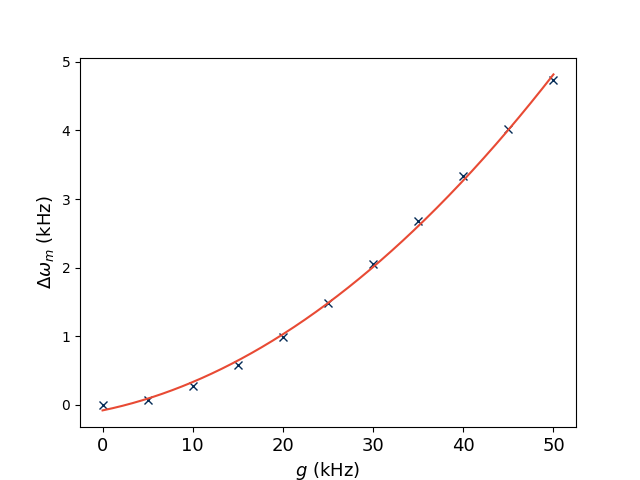

In [7]:
g = (data3[0][::2])/(2*np.pi)
deltaf = np.array(data3[2][::2])-data3[2][0]
plt.plot(g, deltaf, 'x', color='#042b56')

a, b, c = np.polyfit(g, deltaf, 2)
plt.plot(np.linspace(0,50,500), a*np.linspace(0,50,500)**2+b*np.linspace(0,50,500)+ c, color='#e84a34')

plt.xlabel("$g$ (kHz)", fontsize=13)
plt.ylabel("$\Delta \omega_m$ (kHz)", fontsize=13)
plt.xticks(np.arange(0, 60, 10), fontsize=13)
#plt.yticks(np.arange(0, 0.2, 0.025), fontsize=13)
plt.savefig('g_f'+'.pdf',dpi=300, bbox_inches = 'tight') 
plt.show()

## kappa vaikutus

In [ ]:
data4= read_csv("X_kappa_0_100.csv")

In [3]:
print(len(data4))

50


In [4]:
f = data4[60]
p = data4[61]
x,y = viivanleveys(f,p, False)
freq = []
power = []
print(len(freq))
i=1
while i < len(f)/2:
    freq.append(f[i])
    power.append((p[i]+p[-i])/2)
    i = i+1

print(len(freq))    
    
plt.plot(freq, power , color='#042b56')
plt.xlabel("Taajuus $(kHz)$", fontsize=13)
plt.ylabel("Teho", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0,1500)
plt.plot([y-x/2,y+x/2],[max(p)/2, max(p)/2],  color='#042b56') 

print([y-x/2,y+x/2],[max(p)/2, max(p)/2], max(p))
 # location for the zoomed portion 
sub_axes = plt.axes([.24, .4, .35, .35]) 

# plot the zoomed portion
sub_axes.plot(freq[98000:102000], power[98000:102000],  color='#042b56') 
sub_axes.plot([y-x/2,y+x/2],[max(power)/2, max(power)/2],  color='#f1563f') 

print((y+x/2)-(y-x/2))


plt.savefig('result'+'.pdf',dpi=300, bbox_inches = 'tight') 

plt.show()

IndexError: index 60 is out of bounds for axis 0 with size 50

In [10]:
viivanleveydet= []
i=0
while i < len(data4):
    freq = data4[i]
    power = data4[i+1]
    #plt.plot(freq, power)
    viivanleveydet.append(viivanleveys(freq,power)[0])
    i = i + 4
#plt.grid()
#plt.show()
plt.plot(np.linspace(0,100,26), viivanleveydet, 'x', color='#042b56')

a, b = np.polyfit(np.linspace(0,100,26), viivanleveydet, 1)
print(a,b)
plt.plot(np.linspace(0,100,26), a*np.linspace(0,100,26) + b, color='#e84a34')

plt.xlabel("$\kappa$ (kHz)", fontsize=13)
plt.ylabel("Viivanleveys (kHz)", fontsize=13)
plt.xticks(np.arange(0, 110, 10), fontsize=13)
plt.yticks( fontsize=13)
plt.savefig('k_fwhm'+'.pdf',dpi=300, bbox_inches = 'tight')
plt.show()


## gamma vaikutus

### $\sigma_x$ viivanleveyteen

In [5]:
data5= read_csv("sx_s.csv")

[0.0099999916667457, 1.2474989604165785, 2.6674977770833266, 4.162496531249872, 5.462495447916581, 6.772494356250036, 8.119993233333389, 9.324992229166583, 10.667491110416677, 12.087489927083425, 13.282488931249873, 14.692487756250102, 15.752486872916734, 17.284985595833405, 18.567484527083252, 20.062483281250024, 21.389982175000114, 22.53248122291666, 23.907480077083164, 25.26747894375012, 26.677477768749895, 28.002476664583355, 29.34997554166671, 30.3274747270832, 31.58997367500001]


<IPython.core.display.Javascript object>


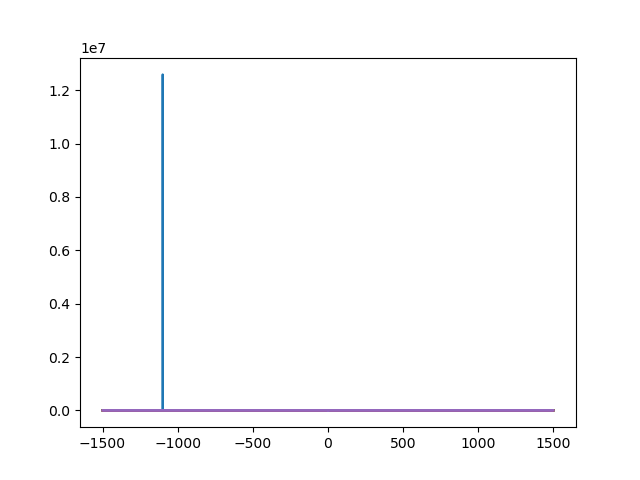

In [6]:
viivanleveydet= []
i=0
while i < len(data5):
    freq = data5[i]
    power = data5[i+1]
    plt.plot(freq, power)
    viivanleveydet.append(viivanleveys(freq,power)[0])
    i = i + 2
print(viivanleveydet)
plt.show()

In [8]:
viivanleveydet= []
i=0
while i < len(data5):
    freq = data5[i]
    power = data5[i+1]
    #plt.plot(freq, power)
    viivanleveydet.append(viivanleveys(freq,power)[0])
    i = i + 2
#plt.grid()
#plt.show()
#viivanleveydet[0]= 0.01
plt.plot(np.linspace(0,100,25), viivanleveydet, 'x', color='#042b56')

a, b = np.polyfit(np.linspace(0,100,25), viivanleveydet, 1)
print(a,b)
plt.plot(np.linspace(0,100,100), a*np.linspace(0,100,100) + b, color='#e84a34')

plt.ylabel("Viivanleveys (kHz)", fontsize=13)
plt.xlabel("$\gamma$ (kHz)", fontsize=13)
plt.xticks(np.arange(0, 110, 10), fontsize=13)
plt.yticks(np.arange(0, 40, 5), fontsize=13)
plt.savefig('g_fwhm'+'.pdf',dpi=300, bbox_inches = 'tight')
plt.show()
 

0.3175658892076923 0.09009223261537613


<IPython.core.display.Javascript object>

### Resonaattorin viivanleveyteen

In [24]:
data6= read_csv("X_s_iso.csv")
data7= read_csv("X_s_pieni.csv")
data8 = read_csv("X_30_100.csv")

<IPython.core.display.Javascript object>


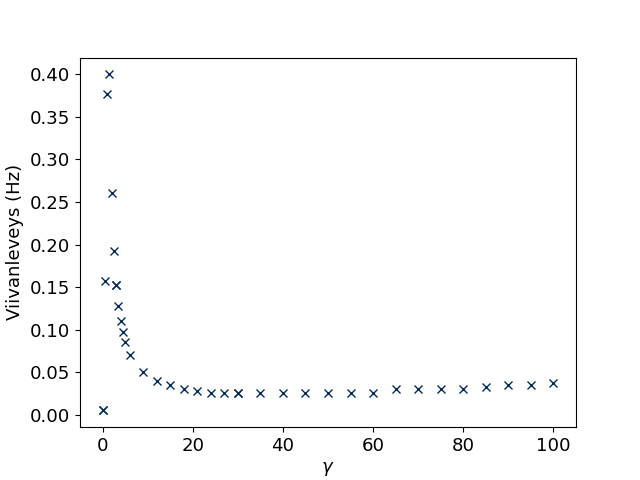

<IPython.core.display.Javascript object>


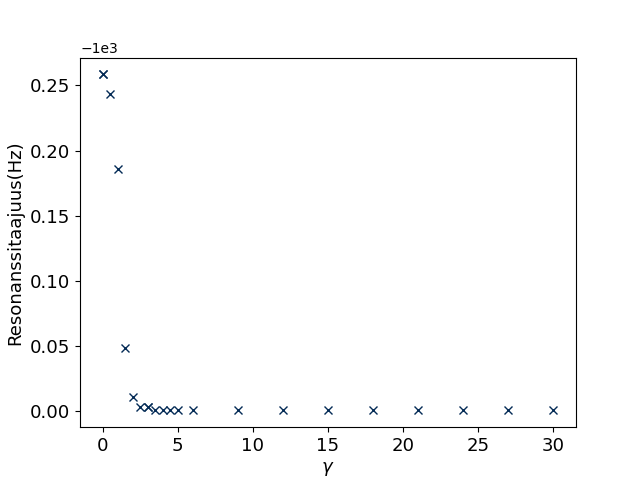

In [47]:
viivanleveydet= []
paikka =[]
i=0
while i < len(data6):
    freq = data6[i]
    power = data6[i+1]
    #plt.plot(freq, power)
    viivanleveydet.append(viivanleveys(freq,power)[0])
    paikka.append(viivanleveys(freq,power)[1])
    i = i + 2
i=0
while i < len(data7):
    freq = data7[i]
    power = data7[i+1]
    #plt.plot(freq, power)
    viivanleveydet.append(viivanleveys(freq,power)[0])
    paikka.append(viivanleveys(freq,power)[1])
    i = i + 2    

    
plt.plot([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30], viivanleveydet[0:11], 'x', color='#042b56')
plt.plot([ 0,  0.5, 1.,  1.5, 2.,  2.5, 3.,  3.5, 4.,  4.5, 5. ], viivanleveydet[11:], 'x', color='#042b56')


plt.plot(data8[0], data8[1], 'x', color='#042b56')
#a, b = np.polyfit(np.linspace(0,1,11), viivanleveydet, 1)
#plt.plot(np.linspace(0,1,100), a*np.linspace(0,1,100) + b)


plt.ylabel("Viivanleveys (kHz)", fontsize=13)
plt.xlabel("$\gamma$", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('g_fwhm_res'+'.pdf',dpi=300, bbox_inches = 'tight')
#plt.xlim(1.5,10)
#plt.yscale("log")


plt.show()


plt.plot([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30], paikka[0:11], 'x', color='#042b56')
plt.plot([ 0,  0.5, 1.,  1.5, 2.,  2.5, 3.,  3.5, 4.,  4.5, 5. ], paikka[11:], 'x', color='#042b56')
plt.ylabel("Resonanssitaajuus(kHz)", fontsize=13)
plt.xlabel("$\gamma$", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

[0, 0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 6, 9, 12, 15, 18, 21, 24, 27, 30, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0]
[0.004999995833259163, 0.04999995833338744, 0.15749986874993738, 0.37749968541675116, 0.39999966666664477, 0.25999978333334184, 0.19249983958331995, 0.15249987291667821, 0.12749989375004134, 0.10999990833340689, 0.09749991875003161, 0.08499992916665633, 0.06999994166665147, 0.03999996666664174, 0.034999970833382577, 0.02999997499989604, 0.027499977083266458, 0.024999979166636876, 0.024999979166636876, 0.024999979166636876, 0.024999979166636876, 0.024999979166636876, 0.024999979166636876, 0.024999979166636876, 0.024999979166636876, 0.024999979166636876, 0.024999979166636876, 0.024999979166636876, 0.02999997499989604, 0.02999997499989604, 0.02999997499989604, 0.02999997499989604, 0.03249997291663931, 0.034999970833382577, 0.034999970833382577, 0.03749996875001216]


<IPython.core.display.Javascript object>


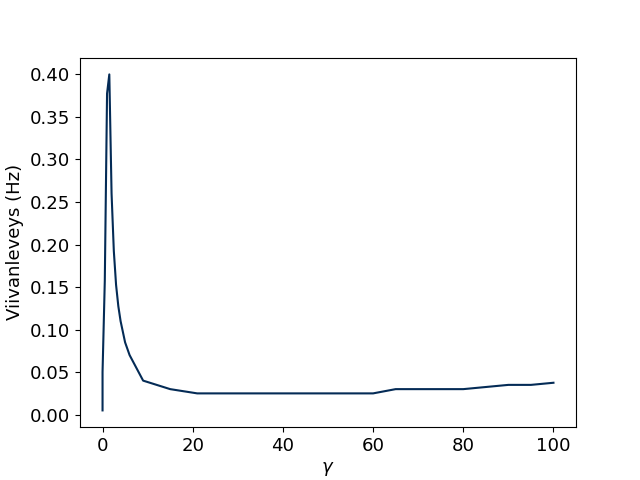

In [59]:
eka = [0,0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0,3.5, 4.0, 4.5, 5.0, 6, 9, 12, 15, 18, 21, 24, 27, 30,   30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0]
toka = [0.004999995833259163,0.04999995833338744, 0.15749986874993738, 0.37749968541675116, 0.39999966666664477, 0.25999978333334184, 0.19249983958331995, 0.15249987291667821,0.12749989375004134, 0.10999990833340689, 0.09749991875003161, 0.08499992916665633, 0.06999994166665147,  0.03999996666664174, 0.034999970833382577, 0.02999997499989604, 0.027499977083266458, 0.024999979166636876, 0.024999979166636876, 0.024999979166636876, 0.024999979166636876,  0.024999979166636876, 0.024999979166636876, 0.024999979166636876, 0.024999979166636876, 0.024999979166636876, 0.024999979166636876, 0.024999979166636876, 0.02999997499989604, 0.02999997499989604, 0.02999997499989604, 0.02999997499989604, 0.03249997291663931, 0.034999970833382577, 0.034999970833382577, 0.03749996875001216]
print(eka)
print(toka)
plt.plot(eka,toka, color='#042b56')



#a, b = np.polyfit(np.linspace(0,1,11), viivanleveydet, 1)
#plt.plot(np.linspace(0,1,100), a*np.linspace(0,1,100) + b)


plt.ylabel("Viivanleveys (Hz)", fontsize=13)
plt.xlabel("$\gamma$", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('g_fwhm_res2'+'.pdf',dpi=300, bbox_inches = 'tight')
#plt.xlim(1.5,10)
#plt.yscale("log")


plt.show()

## Mittausajan vaikutus

In [25]:
gamma_pieni = read_csv("0_5.csv")
gamma_iso = read_csv("5_10.csv")
iso_iso = read_csv("X_s_30_100.csv")
kolmas = read_csv("aika.csv")

KeyboardInterrupt: 

C:\Users\RInkila\AppData\Local\Temp/ipykernel_9688/895559803.py:11: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot((1/gamma_pieni[0][:9])/400,gamma_pieni[2][:9]+1000, 'x', color='#042b56')


<IPython.core.display.Javascript object>


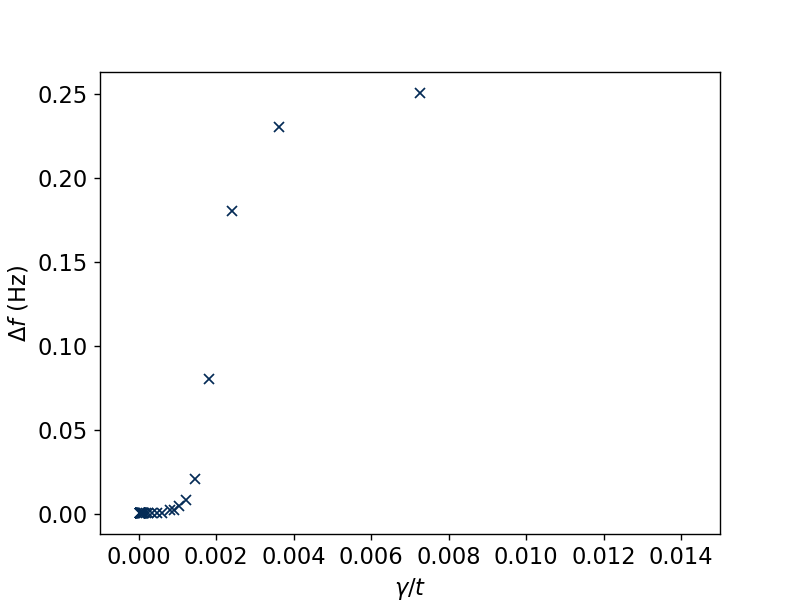

In [21]:
paikka = []

i=0
while i < len(iso_iso):
    freq = iso_iso[i]
    power = iso_iso[i+1]
    paikka.append(viivanleveys(freq,power)[1]+1000)
    i = i + 2    


plt.plot((1/gamma_pieni[0][:9])/400,gamma_pieni[2][:9]+1000, 'x', color='#042b56')
plt.plot((1/gamma_pieni[0][9::3])/400,gamma_pieni[2][9::3]+1000, 'x', color='#042b56')
#plt.plot(gamma_iso[0],gamma_iso[2]+1000, 'x', color='b')
plt.plot((1/np.linspace(30,100,15))/400,paikka, 'x', color='#042b56')
plt.plot((1/kolmas[0][3::2])/400,kolmas[2][3::2]+1000, 'x', color='#042b56')

plt.ylabel("$\Delta f$ (Hz)", fontsize=13)
plt.xlabel("$\gamma/t $", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('gamma_deltaf'+'.pdf',dpi=300, bbox_inches = 'tight')
plt.xlim(-0.001,0.015)
plt.show()

In [28]:
eka = read_csv("tulos_0_5.csv")
toka = read_csv("tulos_5_10.csv")
kolmas = read_csv("tulos_15_60.csv")
neljäs = read_csv("tulos_65_100.csv")

<IPython.core.display.Javascript object>


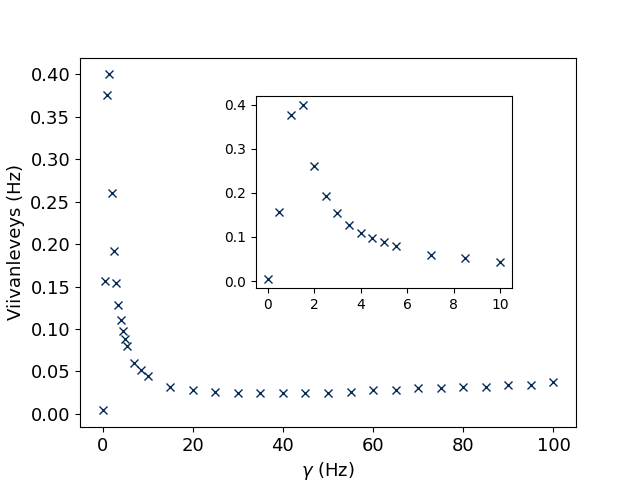

<IPython.core.display.Javascript object>


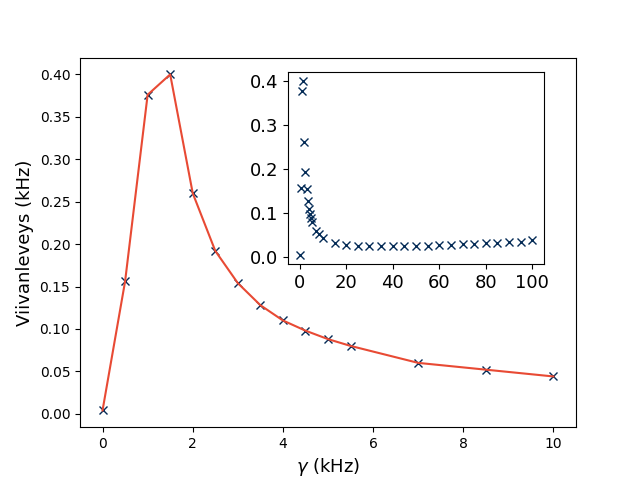

In [30]:
plt.plot(eka[0],eka[1],'x', color='#042b56')
plt.plot(toka[0][::3],toka[1][::3],'x', color='#042b56')
plt.plot(kolmas[0],kolmas[1],'x', color='#042b56')
plt.plot(neljäs[0],neljäs[1],'x', color='#042b56')


plt.ylabel("Viivanleveys (Hz)", fontsize=13)
plt.xlabel("$\gamma$ (Hz)", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Generate data for the zoomed portion
X_detail = eka[0].tolist()+toka[0][::3].tolist()
Y_detail = eka[1].tolist()+toka[1][::3].tolist()


# location for the zoomed portion 
sub_axes = plt.axes([.4, .4, .4, .4]) 

# plot the zoomed portion
sub_axes.plot(X_detail, Y_detail, 'x',  color='#042b56') 


plt.show()


plt.plot(X_detail, Y_detail, 'x',  color='#042b56')
plt.plot(X_detail, Y_detail, color='#e84a34')

plt.ylabel("Viivanleveys (kHz)", fontsize=13)
plt.xlabel("$\gamma$ (kHz)", fontsize=13)

# location for the zoomed portion 
sub_axes = plt.axes([.45, .45, .4, .4])
sub_axes.plot(eka[0],eka[1],'x', color='#042b56')
sub_axes.plot(toka[0][::3],toka[1][::3],'x', color='#042b56')
sub_axes.plot(kolmas[0],kolmas[1],'x', color='#042b56')
sub_axes.plot(neljäs[0],neljäs[1],'x', color='#042b56')


plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('g_fwhm_res'+'.pdf',dpi=300, bbox_inches = 'tight')
#plt.xlim(1.5,10)
#plt.yscale("log")
plt.show()

<IPython.core.display.Javascript object>


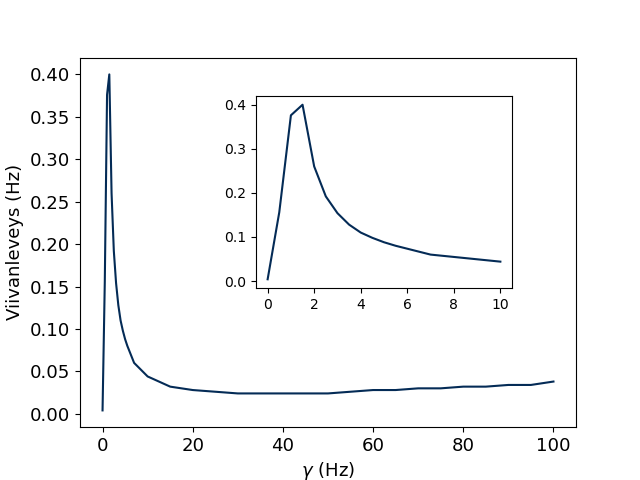

In [67]:
plt.plot(eka[0].tolist()+toka[0][::3].tolist()+kolmas[0].tolist()+neljäs[0].tolist(),eka[1].tolist()+toka[1][::3].tolist()+kolmas[1].tolist()+neljäs[1].tolist(), color='#042b56')

plt.ylabel("Viivanleveys (Hz)", fontsize=13)
plt.xlabel("$\gamma$ (Hz)", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Generate data for the zoomed portion
X_detail = eka[0].tolist()+toka[0][::3].tolist()
Y_detail = eka[1].tolist()+toka[1][::3].tolist()

 # location for the zoomed portion 
sub_axes = plt.axes([.4, .4, .4, .4]) 

# plot the zoomed portion
sub_axes.plot(X_detail, Y_detail,  color='#042b56') 

plt.savefig('g_fwhm_res2'+'.pdf',dpi=300, bbox_inches = 'tight')
#plt.xlim(1.5,10)
#plt.yscale("log")
plt.show()

<IPython.core.display.Javascript object>


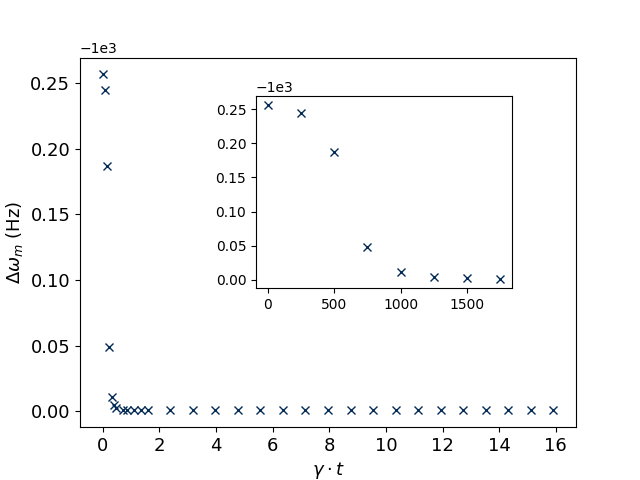

In [6]:
plt.plot(eka[0][:6]/(2*np.pi),eka[2][:6],'x', color='#042b56')
plt.plot(eka[0][6::3]/(2*np.pi),eka[2][6::3],'x', color='#042b56')
plt.plot(toka[0][::3]/(2*np.pi),toka[2][::3],'x', color='#042b56')
plt.plot(kolmas[0]/(2*np.pi),kolmas[2],'x', color='#042b56')
plt.plot(neljäs[0]/(2*np.pi),neljäs[2],'x', color='#042b56')


plt.ylabel("$\Delta \omega_m$ (Hz)", fontsize=13)
plt.xlabel("$\gamma\cdot t $", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)




# Generate data for the zoomed portion
X_detail = eka[0][:8]*500
Y_detail = eka[2][:8]


 # location for the zoomed portion 
sub_axes = plt.axes([.4, .4, .4, .4]) 

# plot the zoomed portion
sub_axes.plot(X_detail, Y_detail, 'x',  color='#042b56') 
plt.savefig('gamma_deltaf'+'.pdf',dpi=300, bbox_inches = 'tight')

plt.show()

<IPython.core.display.Javascript object>


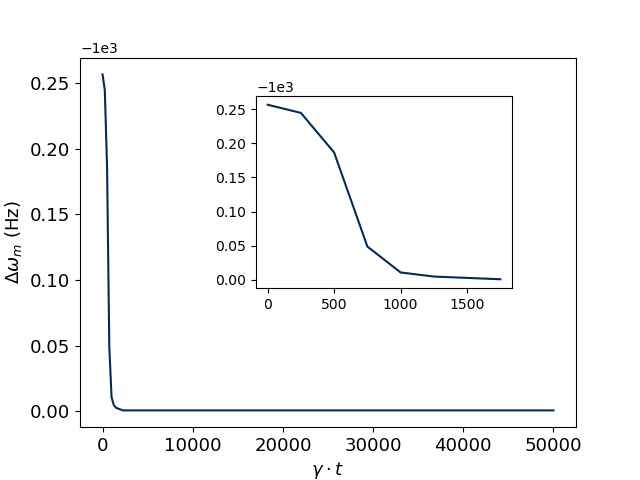

In [74]:
e = (eka[0][:6].tolist()+eka[0][6::3].tolist()+toka[0][::3].tolist()+kolmas[0].tolist()+neljäs[0].tolist())
multiple = 500
e = [x*multiple for x in e]
t = eka[2][:6].tolist()+eka[2][6::3].tolist()+toka[2][::3].tolist()+kolmas[2].tolist()+neljäs[2].tolist()
plt.plot(e,t, color='#042b56')


plt.ylabel("$\Delta \omega_m$ (Hz)", fontsize=13)
plt.xlabel("$\gamma\cdot t $", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)




# Generate data for the zoomed portion
X_detail = eka[0][:8]*500
Y_detail = eka[2][:8]


 # location for the zoomed portion 
sub_axes = plt.axes([.4, .4, .4, .4]) 

# plot the zoomed portion
sub_axes.plot(X_detail, Y_detail,  color='#042b56') 
plt.savefig('gamma_deltaf2'+'.pdf',dpi=300, bbox_inches = 'tight')

plt.show()